# Chat Bot with Lang Graph


### Required packages and installations

In [1]:
!pip install langgraph langsmith
!pip install --upgrade pip
!pip install langchain_groq langchain_community

Defaulting to user installation because normal site-packages is not writeable
Defaulting to user installation because normal site-packages is not writeable
Defaulting to user installation because normal site-packages is not writeable


### Creating the environment suited for your use case, here I used VS code locally, hence used this environemnt

In [2]:
# you can directly export the API key as an environment variable in your shell or notebook:
# Store as an environment Variable
# Best practice is always secure your api key using .env file

# For groq and groq cloud where open source llm is accessed
import os

os.environ['Api_Key'] = 'your api key'

API_KEY = os.getenv('Api_Key')
print(API_KEY)

# For langchain api key, the environment is set from here

os.environ['Lang_Smith_API_Key'] = 'your api key'

LangSmith_Api_key = os.getenv('Lang_Smith_API_Key')

# Creating the environment and connection and tracing and project name
os.environ['LANGCHAIN_API_KEY'] = LangSmith_Api_key
os.environ['LANGCHAIN_TRACING_V2'] = 'True'
os.environ['LANGCHAIN_PROJECT'] = 'CHATBOT'

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


### Importing neccessary libraries 

In [3]:
from langchain_groq import ChatGroq
from typing import Annotated
from typing_extensions import TypedDict
from langgraph.graph import StateGraph, START, END
from langgraph.graph.message import add_messages

/Users/abdulrabbani/Library/Python/3.9/lib/python/site-packages/urllib3/__init__.py:35: NotOpenSSLWarning: urllib3 v2 only supports OpenSSL 1.1.1+, currently the 'ssl' module is compiled with 'LibreSSL 2.8.3'. See: https://github.com/urllib3/urllib3/issues/3020
  warnings.warn(


### Using the chatGroq library employing the API key and LLM Model Gemma2-9b-It, you can use which model suits better for your use case

In [4]:
llm = ChatGroq(groq_api_key = API_KEY, model_name='Gemma2-9b-It')
llm

ChatGroq(client=<groq.resources.chat.completions.Completions object at 0x10bcad460>, async_client=<groq.resources.chat.completions.AsyncCompletions object at 0x10bca1730>, model_name='Gemma2-9b-It', groq_api_key=SecretStr('**********'))

### Stategraph initialisation, managing the graph state

In [5]:
#TypeDict is the collection of langchain messages the class defines the structure of our graph
class State(TypedDict):
    messages:Annotated[list, add_messages]

graph_builder = StateGraph(State)
graph_builder

### Chatbot 

In [6]:
def chatbot(state: State):
    return {"messages": llm.invoke(state['messages'])}

#This is our graph state and architecture of Langgraph

graph_builder.add_node('chatbot', chatbot)
graph_builder.add_edge(START, 'chatbot')
graph_builder.add_edge('chatbot', END)
graph = graph_builder.compile()

### Langgraph Architecture and its design

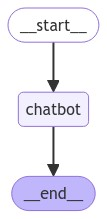

In [7]:
from IPython.display import Image, display
try:
    display(Image(graph.get_graph().draw_mermaid_png()))
except Exception:
    pass

### Chatbot functionality

In [8]:
while True:
    user_data = input("User_Input: ")
    
    if user_data.lower() in ['quit', 'q']:
        print("Thank you and Closing the chat")
        break

    try:
        # Debugging: Print each event to understand its structure
        for event in graph.stream({'messages': ("user", user_data)}):
            print("Event:", event)  # Inspect the event object

            for value in event.values():
                print("Value:", value)  # Inspect each value

                # Check if the key 'messages' exists in the value
                if 'messages' in value:
                    print("Assistant:", value['messages'].content)
                else:
                    print("Error: 'messages' key not found in value")
    
    except ValueError as ve:
        print(f"ValueError occurred: {ve}")  # Show the actual error message
    except Exception as e:
        print(f"An unexpected error occurred: {e}")


Event: {'chatbot': {'messages': AIMessage(content="Generative AI is a fascinating branch of artificial intelligence that focuses on creating new content. \n\nThink of it like this: instead of simply analyzing existing data, generative AI learns the underlying patterns and structures within that data, then uses that knowledge to generate entirely new pieces of content. \n\nHere's a breakdown:\n\n**What it does:**\n\n* **Creates text:** Write stories, poems, articles, dialogue, and even code.\n* **Generates images:** Produce realistic photographs, paintings, illustrations, and designs.\n* **Composes music:** Craft original melodies, harmonies, and even entire musical pieces.\n* **Produces videos:**  Synthesize short clips, animations, or even longer video sequences.\n* **Designs 3D models:**  Create realistic or abstract 3D objects for various purposes.\n\n**How it works:**\n\nGenerative AI models are typically trained on massive datasets of existing content. They learn the statistical r